* Course    : CS513 - Knowledge Discovery and Data Mining
* First Name: John
* Last Name : Rizzo
* Student ID: 20036833
* Purpose   : CS513_HW_02_EDA

Load the “breast-cancer-wisconsin.data.csv” from canvas into R/Python and perform the EDA analysis by:

* Summarizing each column (e.g. min, max, mean )
* Identifying missing values
* Replacing the missing values with the “mean” of the column.
* Displaying the frequency table of “Class” vs. F6
* Displaying the scatter plot of F1 to F6, one pair at a time
* Show histogram box plot for columns F7 to F9

Delete all the objects from your R/Python- environment. Reload the “breast-cancer-wisconsin.data.csv” from canvas into R/Python. Remove any row with a missing value in any of the columns.


In [2]:
# ! python --version
# ! pip install numpy==2.0.2
# ! pip install pydantic-settings
# ! pip install ydata-profiling
# ! pip install pandas
# ! pip install matplotlib

In [3]:
# !pip list

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

%matplotlib inline

In [5]:
coltype = {
    'Sample': 'Int64',
    'F1': 'Int64',
    'F2': 'Int64',
    'F3': 'Int64',
    'F4': 'Int64',
    'F5': 'Int64',
    'F6': 'Int64',
    'F7': 'Int64',
    'F8': 'Int64',
    'F9': 'Int64',
    'Class': 'Int64'
}

folder = '../data/'

df = pd.read_csv(folder+'breast-cancer-wisconsin.csv', na_values='?', dtype=coltype)
df.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
# I Summarizing each column (e.g. min, max, mean)
print(df.describe())

               Sample        F1        F2        F3        F4        F5  \
count           699.0     699.0     699.0     699.0     699.0     699.0   
mean   1071704.098712   4.41774  3.134478  3.207439  2.806867  3.216023   
std     617095.729819  2.815741  3.051459  2.971913  2.855379    2.2143   
min           61634.0       1.0       1.0       1.0       1.0       1.0   
25%          870688.5       2.0       1.0       1.0       1.0       2.0   
50%         1171710.0       4.0       1.0       1.0       1.0       2.0   
75%         1238298.0       6.0       5.0       5.0       4.0       4.0   
max        13454352.0      10.0      10.0      10.0      10.0      10.0   

             F6        F7        F8        F9     Class  
count     683.0     699.0     699.0     699.0     699.0  
mean   3.544656  3.437768  2.866953  1.589413  2.689557  
std    3.643857  2.438364  3.053634  1.715078  0.951273  
min         1.0       1.0       1.0       1.0       2.0  
25%         1.0       2.0       1.

In [7]:
# II Identifying missing values

print(df[df.isna().any(axis=1)])
print(df.isnull().sum())

      Sample  F1  F2  F3  F4  F5    F6  F7  F8  F9  Class
23   1057013   8   4   5   1   2  <NA>   7   3   1      4
40   1096800   6   6   6   9   6  <NA>   7   8   1      2
139  1183246   1   1   1   1   1  <NA>   2   1   1      2
145  1184840   1   1   3   1   2  <NA>   2   1   1      2
158  1193683   1   1   2   1   3  <NA>   1   1   1      2
164  1197510   5   1   1   1   2  <NA>   3   1   1      2
235  1241232   3   1   4   1   2  <NA>   3   1   1      2
249   169356   3   1   1   1   2  <NA>   3   1   1      2
275   432809   3   1   3   1   2  <NA>   2   1   1      2
292   563649   8   8   8   1   2  <NA>   6  10   1      4
294   606140   1   1   1   1   2  <NA>   2   1   1      2
297    61634   5   4   3   1   2  <NA>   2   3   1      2
315   704168   4   6   5   6   7  <NA>   4   9   1      2
321   733639   3   1   1   1   2  <NA>   3   1   1      2
411  1238464   1   1   1   1   1  <NA>   2   1   1      2
617  1057067   1   1   1   1   1  <NA>   1   1   1      2
Sample     0
F

In [8]:
# III Replace the missing values with the "mean" of the column
df['F6']=df['F6'].fillna(df['F6'].mean().round())
print(df[df.isna().any(axis=1)])
print(df.isnull().sum())

Empty DataFrame
Columns: [Sample, F1, F2, F3, F4, F5, F6, F7, F8, F9, Class]
Index: []
Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64


In [9]:
# IV Display the frequency table of 'Class' vs 'F6'
print(pd.crosstab(df['Class'], df['F6']))

F6      1   2   3   4   5   6   7   8   9    10
Class                                          
2      387  21  14  20  10   0   1   2   0    3
4       15   9  14  15  20   4   7  19   9  129


array([[<Axes: xlabel='F1', ylabel='F1'>,
        <Axes: xlabel='F2', ylabel='F1'>,
        <Axes: xlabel='F3', ylabel='F1'>,
        <Axes: xlabel='F4', ylabel='F1'>,
        <Axes: xlabel='F5', ylabel='F1'>,
        <Axes: xlabel='F6', ylabel='F1'>],
       [<Axes: xlabel='F1', ylabel='F2'>,
        <Axes: xlabel='F2', ylabel='F2'>,
        <Axes: xlabel='F3', ylabel='F2'>,
        <Axes: xlabel='F4', ylabel='F2'>,
        <Axes: xlabel='F5', ylabel='F2'>,
        <Axes: xlabel='F6', ylabel='F2'>],
       [<Axes: xlabel='F1', ylabel='F3'>,
        <Axes: xlabel='F2', ylabel='F3'>,
        <Axes: xlabel='F3', ylabel='F3'>,
        <Axes: xlabel='F4', ylabel='F3'>,
        <Axes: xlabel='F5', ylabel='F3'>,
        <Axes: xlabel='F6', ylabel='F3'>],
       [<Axes: xlabel='F1', ylabel='F4'>,
        <Axes: xlabel='F2', ylabel='F4'>,
        <Axes: xlabel='F3', ylabel='F4'>,
        <Axes: xlabel='F4', ylabel='F4'>,
        <Axes: xlabel='F5', ylabel='F4'>,
        <Axes: xlabel='F6', yla

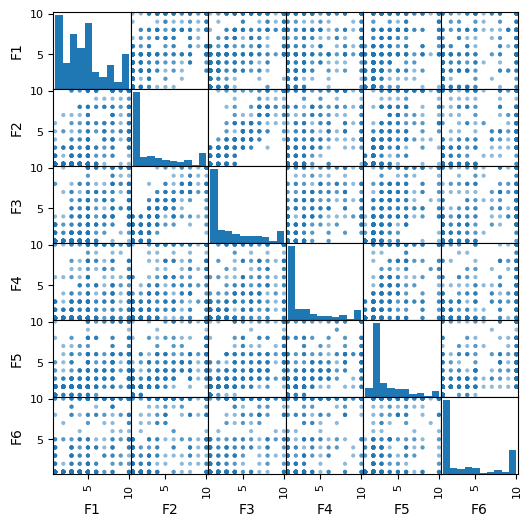

In [23]:
# V Displaying the scatter plot of F1 to F6, one pair at a time
pd.plotting.scatter_matrix(df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6']], figsize=(6,6), diagonal='hist')

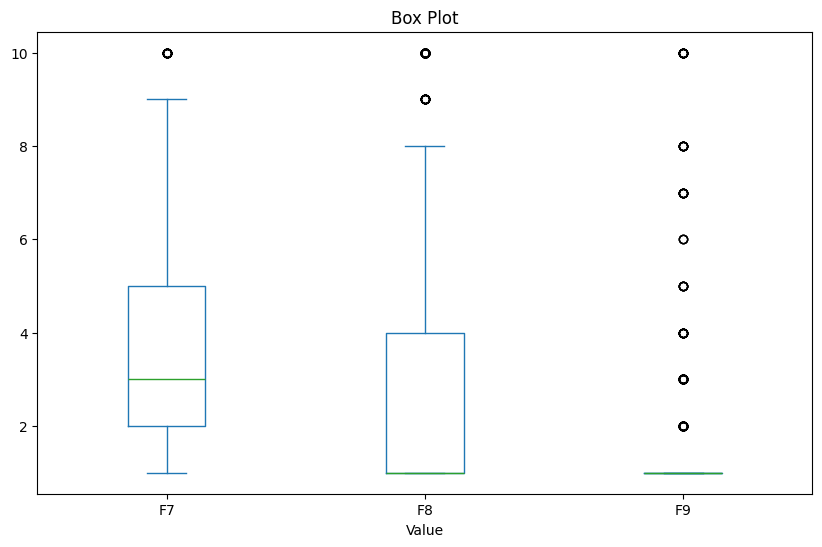

In [ ]:
# VI Show histogram box plot 

df[['F7', 'F8', 'F9']].plot(kind='box', vert=True, figsize=(10, 6))
plt.title("Box Plot", fontsize=12)
plt.xlabel("Value")
plt.show()

In [ ]:
# 2 Delete all the objects from your R/Python environment.  Reload the "breast-cancer-wisconsin.data.csv" from canvas into R/Python.
# Remove any row with a missing value in any of the columns
df_clean = pd.read_csv(folder+'breast-cancer-wisconsin.csv', na_values='?', dtype=coltype)
print(f"Shape before cleaning {df_clean.shape}")

df_clean = df_clean.dropna()
print(f"Shape after cleaning {df_clean.shape}")

print(df_clean.head())
print(df_clean.isnull().sum())

Shape before cleaning (699, 11)
Shape after cleaning (683, 11)
    Sample  F1  F2  F3  F4  F5  F6  F7  F8  F9  Class
0  1000025   5   1   1   1   2   1   3   1   1      2
1  1002945   5   4   4   5   7  10   3   2   1      2
2  1015425   3   1   1   1   2   2   3   1   1      2
3  1016277   6   8   8   1   3   4   3   7   1      2
4  1017023   4   1   1   3   2   1   3   1   1      2
Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64
